### Biblioteki używane w rozwiązaniu zadań

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Zadanie 1

Zapiszmy informacje o populacji Stanów Zjednoczonych na przestrzeni lat (podane w ramach **laboratorium 3**) w postaci tablic numpy'owych.

In [2]:
year = np.array([1900,
                1910,
                1920,
                1930,
                1940,
                1950,
                1960,
                1970,
                1980], dtype = np.double) # so that there is no overflow

population = np.array([76212168,
                        92228496,
                        106021537,
                        123202624,
                        132164569,
                        151325798,
                        179323175,
                        203302031,
                        226542199])

W tym zadaniu wykonujemy aproksymację średniokwadratową punktową dla populacji USA w przedziale $[1900; 1980]$ wielomianami stopnia $m$ dla $m=0,1,...,6$. Wielomian aproksymacyjny zapisujemy w postaci $p(x)=\sum_{j=0}^mc_j\phi_j(x)$, gdzie $c_j$ to współczynniki wyliczone ze wzoru (można go wyprowadzić korzystając z równania $A \cdot c = y$, czyli *równania normalnego*): $S \cdot c=T$, przy czym $S$ to macierz kwadratowa wymiarów $(m+1) \times (m+1)$ z wyrazami postaci $S_{i+j}$ dla wiersza $i$ oraz kolumny $j$ (numerując od zera), gdzie $S_k=\sum_{i=0}^nx_i^k$ dla $k=0,1,...,2m$, z kolei $c$ to szukana kolumna współczynników oraz $T$ to kolumna z wyrazami postaci $T_k=\sum_{i=0}^nx_i^ky_i$ dla $k=0,1,...,m$, gdzie $x_i$ to kolejne lata, a $y_i$ to wartości z kolumny populacji. Natomiast $\phi_j(x)$ to tzw. *funkcje bazowe*, które w przypadku aproksymacji dyskretnej są postaci $\phi_j(x)=x^j$.

In [3]:
m = np.arange(0, 7)

#tu zapisujemy uzyskane kolumny współczynników dla każdego m
C = []

for i in range(len(m)):
    #korzystamy z oznaczeń z równania normalnego
    A = np.vander(year, m[i] + 1, increasing = True) 
    S = np.dot(np.transpose(A), A)
    T = np.dot(np.transpose(A), population)

    #obliczamy kolumnę współczynników
    c = np.linalg.solve(S, T)
    C.append(c)

Przejdźmy teraz do ekstrapolacji uzyskanych wielomianów do roku 1990.

In [4]:
correct_val = 248709873
extrapolate_year = 1990

#tu zapisujemy uzyskane wyniki i błędy względne
R = []

for i in range(len(m)):
    c = np.flip(C[i])
    approx_val = np.polyval(c, extrapolate_year)
    relative_error = np.abs(approx_val - correct_val) / correct_val
    
    R.append((approx_val, relative_error))

Następnie znajdujemy stopień wielomianu $m$. dla którego błąd względny aproksymacji jest najmniejszy. W tym celu wyświetlmy uzyskane wyniki, oczywiście w ogólnym przypadku taki proces należałoby zautomatyzować - tutaj z powodu niewielkiej porcji danych, wskażemy wartość $m$ ręcznie.

In [5]:
def print_result(m, result):
    print("Stopień wielomianu m\t\tEkstrapolowana wartość dla 1990r.\t\tBłąd względny")
    
    for i in range(len(m)):
        print("\t", i, end = '')
        print("\t\t\t\t", int(np.around(result[i][0], decimals = 0)), end = '')
        print("\t\t\t\t", np.around(result[i][1], decimals = 6))
        
print_result(m, R)

Stopień wielomianu m		Ekstrapolowana wartość dla 1990r.		Błąd względny
	 0				 143369177				 0.423549
	 1				 235808109				 0.051875
	 2				 254712945				 0.024137
	 3				 261439962				 0.051184
	 4				 263612281				 0.059919
	 5				 274500666				 0.103698
	 6				 240280933				 0.033891


Wartości ekstrapolowane zaokrągliliśmy do całości (bo wyrażają populację), a wartości błędu względnego do 6 cyfr po przecinku.

---

Widać, że najmniejszy błąd względny osiągamy dla $m=2$. Sprawdźmy, czy pokrywa to się z rezultatem obliczonym z wykorzystaniem kryterium informacyjnego Akaikego.

### Kryterium informacyjne Akaikego

Szerzej traktujemy o nim w sprawozdaniu, tutaj skupiamy się na obliczeniach. Dla każdej wartości $m$ wyznaczamy wartość $\mathrm{AIC}_c=\mathrm{AIC}+\frac{2k(k+1)}{n-k-1}.$ Wyjaśnijmy pojawiające się w tym wzorze wielkości. $\mathrm{AIC}=2k+n\ln\left(\frac{\sum_{i=1}^n[y_i-\hat{y}(x_i)]^2}{n}\right)$ to właśnie kryterium informacyjne Akaikego, w którym $y_i$ to rzeczywiste wartości populacji, a $\hat{y}(x_i)$ - aproksymowane przez model. Ponadto $n=9$ to liczba zestawów danych (mamy dane z 9 lat), a $k=m+1$. Mniejsza wartość $\mathrm{AIC}_c$ oznacza lepszy model.

In [6]:
def AIC_c(m, n): #pozostałe użyte wielkości traktujemy jako globalne
    c = np.flip(C[m])
    k = m + 1
    y_hat_values = np.polyval(c, year)
    
    AIC = 2 * k + n * np.log(np.sum((population - y_hat_values) ** 2) / n)
    correction = 2 * k * (k + 1) / (n - k - 1)
    
    return AIC + correction

In [7]:
n = 9

print("Stopień wielomianu m\t\tWartość kryterium Akaikego")
for i in range(len(m)):
    AIC = AIC_c(i, n)
    
    print("\t", i, end = '')
    print("\t\t\t\t", np.around(AIC, decimals = 6))

Stopień wielomianu m		Wartość kryterium Akaikego
	 0				 321.010975
	 1				 289.056478
	 2				 279.453374
	 3				 284.880402
	 4				 297.927536
	 5				 326.842462
	 6				 387.009551


Przy wypisywaniu wartości kryterium zaokrąglamy wynik do 6 cyfr po przecinku.

Widać, że najmniejsza wartość kryterium wychodzi dla $m=2$. Zgadza się to z wcześniej wyznaczoną wartością $m$, dla której błąd względny ekstrapolacji do roku 1990 był najmniejszy.

---

Poniżej dodatkowo prezentujemy wykres wielomianu aproksymującego dla $m=2$. Wykres obejmuje wartości wielomianu w latach 1900 - 1990 w odstępach jednorocznych. 

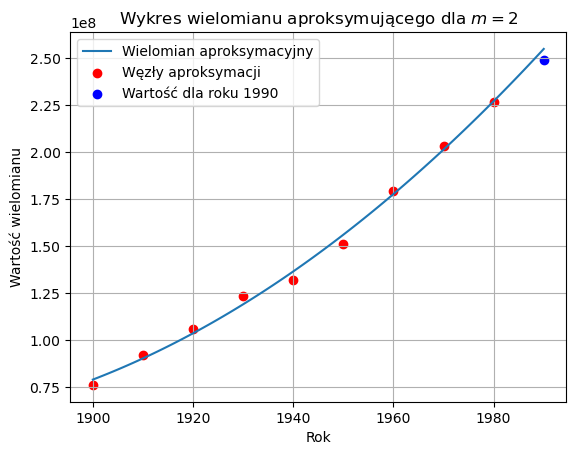

In [8]:
xs = np.arange(1900, 1991, 1)
ys = np.polyval(np.flip(C[2]), xs)

plt.plot(xs, ys, label = 'Wielomian aproksymacyjny')
plt.scatter(year, population, color = 'red', label = 'Węzły aproksymacji')
plt.scatter(extrapolate_year, correct_val, color = 'blue', label = 'Wartość dla roku 1990')
plt.xlabel('Rok')
plt.ylabel('Wartość wielomianu')
plt.title(r'Wykres wielomianu aproksymującego dla $m=2$')
plt.legend()
plt.grid(True)
plt.show()

# Zadanie 2

W tym zadaniu badamy własności aproksymacji średniokwadratowej ciągłej. Zgodnie z poleceniem zadania, aproksymowaną funkcją jest $f(x)=\sqrt{x}$ dla $x \in [0;2]$. Przyjmujemy stopień wielomianu aproksymacyjnego $n=2$.

In [9]:
def f(x): return np.sqrt(x)

Tym razem funkcjami bazowymi są wielomiany Czebyszewa. Szerzej o nich traktujemy w sprawozdaniu, tutaj przedstawiamy obliczenia, korzystając z ich własności, co znacznie uprości obliczenia.

In [10]:
#używamy x - 1 w miejsce x ze względu na dziedzinę wielomianów Czebyszewa, czyli [-1;1]
def phi(x, n): 
    match n:
        case 0: return 1
        case 1: return x - 1
        case 2: return 2 * (x - 1) ** 2 - 1

Aby wyznaczyć kolumnę współczynników $c$ w przypadku ciagłym, również należy rozwiązać równanie macierzowe postaci $S \cdot c=T$, ale tutaj macierz po lewej stronie równania (umownie oznaczamy ją $S$) ma wymiary $(n+1) \times (n+1)$ oraz (numerując od 0) ma na pozycji w wierszu $i$, kolumnie $j$ wyraz $<\phi_i, \phi_j>$, czyli iloczyn skalarny tych funkcji, definiowany jako $\int_{-1}^1w(x)\phi_i(x)\phi_j(x)$, gdzie $w(x)$ to funkcja wagowa. Z kolei kolumna $T$ zawiera wyrazy postaci $<f, \phi_i>$ dla wiersza $i$, numerując od zera.

---

Wielomiany Czebyszewa są **ortogonalne**, co sprawia, że iloczyny skalarne się zerują dla $i \neq j$, ponadto dla $i=j$ wartości są znane.

In [11]:
#funkcja wagowa dla wielomianów Czebyszewa
def weight(x):
    return (1 - (x - 1) ** 2) ** (-0.5)

#wartości dla i == j
def dot_product_chebyshev(n): 
    if n == 0: return np.pi
    return np.pi / 2

def dot_product(n):
    def f_integrate(x):
        return weight(x) * f(x) * phi(x, n)
    
    xs = np.linspace(0.01, 1.99, 50) #nie bierzemy całego przedziału [0;2] ze względu na funkcję wagową
    ys = f_integrate(xs)

    return np.trapz(ys, xs)

W tym przypadku zachodzi, że $c_k=\frac{<f, \phi_k>}{<\phi_k, \phi_k>}$. Poniżej obliczamy te współczynniki, korzystając z tego wzoru.

In [12]:
def c_i(i):
    return dot_product(i) / dot_product_chebyshev(i)

cs = [c_i(i) for i in range(3)]

Szukany wielomian aproksymacyjny analogicznie wyrażamy w postaci $p(x)=\sum_{k=0}^nc_k\phi_k(x)$.

In [13]:
def eval_poly(coeffs, x):
    res = 0
    for i, c in enumerate(coeffs):
        res += c * phi(x, i)
    
    return res

Przedstawmy funkcję aproksymowaną i aproksymacyjną na wspólnym wykresie.

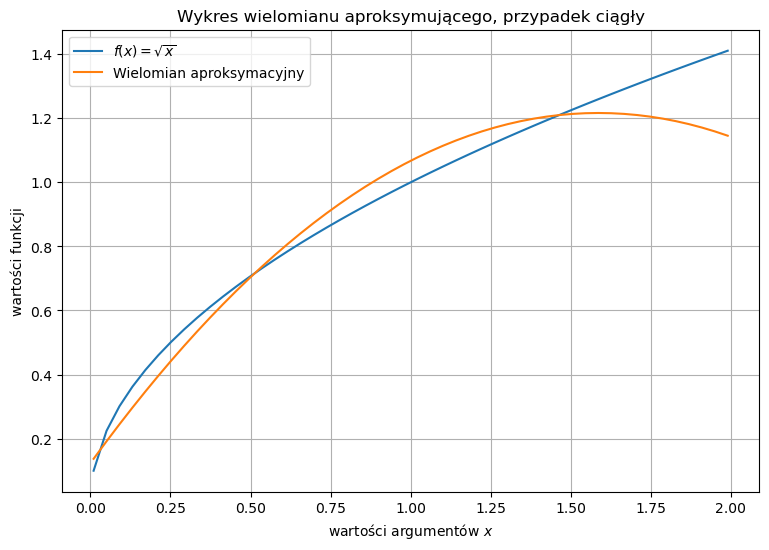

In [14]:
xs = np.linspace(0.01, 1.99, 50)
y_values = f(xs)
ys = eval_poly(cs, xs)

plt.figure(figsize = (9, 6))
plt.plot(xs, y_values, label = r'$f(x) = \sqrt{x}$')
plt.plot(xs, ys, label = "Wielomian aproksymacyjny")

plt.xlabel(r"wartości argumentów $x$")
plt.ylabel("wartości funkcji")
plt.title("Wykres wielomianu aproksymującego, przypadek ciągły")
plt.legend()
plt.grid()
plt.show()

Policzymy teraz błąd względny naszej metody. 

In [15]:
def err(): 
    def f_err(x):
        return np.abs(eval_poly(cs, x) - f(x)) # cs wyliczone powyżej
    
    ys = f_err(xs) # xs = np.linspace(0.1, 1.99, 50), również wyliczone powyżej
    integral = np.trapz(ys, xs)
    
    return integral / 2

relative_error = err()
print("Wartość błędu względnego:", np.around(relative_error, decimals = 6))

Wartość błędu względnego: 0.062147
